### Уравнение теплопроводности на ограниченных интервалах
Наша цель - вычислить и визуализировать решения уравнения теплопроводности
$$u_t = D u_{xx}, \quad 0<x<L$$
в промежутке $[0,L]$ с граничными условиями Дирихле $u(0,t)=0=u(L,t)$ или граничные условия Неймана $u_x(0,t)=0=u_x(L,t)$ в конечных точках. Сначала мы загружаем необходимые модули Python.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors

Далее мы определяем следующие функции:
* `discrete_laplacian` обеспечивает центрированную конечно-разностную аппроксимацию второй производной $u_{xx}$;
* `update_solution` использует прямой метод Эйлера для обновления решения до следующего временного шага;
* `update_graph` оживляет решение.

In [2]:
def discrete_laplacian(u, bdy):
    L = -2*u
    L += np.roll(u, -1)
    L += np.roll(u, +1)
    if bdy == 'Dirichlet':
        L[0]  = -2*u[0]+u[1]
        L[-1] = -2*u[-1]+u[-2]
    elif bdy == 'Neumann':
        L[0]  = 2*(-u[0]+u[1])
        L[-1] = 2*(-u[-1]+u[-2])
    return L

def update_solution(f, vDir, vNeu, d, Nframes, Nskip):
    n = 0
    uDir = np.copy(f)
    uNeu = np.copy(f)
    vDir[0, :] = uDir
    vNeu[0, :] = uNeu
    while n<Nframes:
        n += 1
        for k in range(Nskip):
            uDir += d*discrete_laplacian(uDir, 'Dirichlet')
            uNeu += d*discrete_laplacian(uNeu, 'Neumann')
        vDir[n, :] = uDir
        vNeu[n, :] = uNeu
        yield [uDir, uNeu]

def update_graph(U, x, line1, line2):
    line1.set_data(x, U[0][:])
    line2.set_data(x, U[1][:])

В следующей ячейке мы определяем константу диффузии $D>0$, установите начальное условие и запустите анимацию решения.

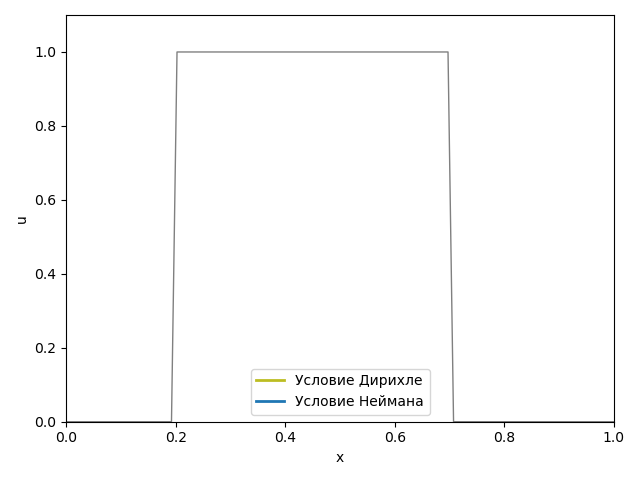

In [5]:
%matplotlib widget
# параметр модели
D = 0.001        # коэффициент диффузии
L = 1            # длинна области

# числовые параметры
N = 100          # размре сетки

# установите начальное условие
x = np.linspace(0, L, N)
f = np.heaviside(x-0.2, 0) - np.heaviside(x-0.7, 0)

# параметры анимации
Nsteps = 4000
Nskip = 5

# установите временной шаг, удовлетворяющий критерию стабильности (cfl = D*Δt/Δx^2 < 0.5)
cfl = 0.4
dx = L/(N-1)
dt = cfl / D * dx**2

# вычислительное и анимационное решение
Nframes = int(Nsteps/Nskip)
vDir = np.zeros((Nframes, N))
vNeu = np.zeros((Nframes, N))

fig = plt.figure()
ax  = plt.axes(xlim=(0,1), ylim=(np.min(np.min(f)*1.1,0), np.max(np.max(f)*1.1,0)))
line1, = ax.plot([], [], linewidth=2, color = "tab:olive")
line2, = ax.plot([], [], linewidth=2, color = "tab:blue")
line3, = ax.plot(x, f, linewidth=1, color = "grey")
ax.set_xlabel('x')
ax.set_ylabel('u')
plt.legend((line1, line2), ('Условие Дирихле', 'Условие Неймана'))
ani = animation.FuncAnimation(fig, update_graph,
                              update_solution(f, vDir, vNeu, cfl, Nframes, Nskip),
                              fargs=(x, line1, line2),
                              interval=25, blit=False, repeat=False)
plt.tight_layout()
plt.show()

Наконец, мы визуализируем решения в виде пространственно-временных контурных графиков.

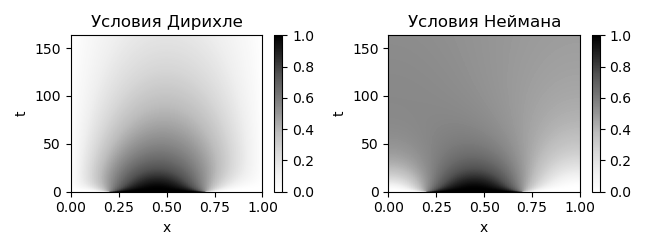

In [6]:
%matplotlib widget

fig, ax = plt.subplots(1,2,figsize=(6.5,2.5))
extent = [0, L, 0, Nsteps*dt]
imu = ax[0].imshow(vDir, cmap='Greys', extent=extent, aspect='auto', origin='lower')
imv = ax[1].imshow(vNeu, cmap='Greys', extent=extent, aspect='auto', origin='lower')
ax[0].set_title('Условия Дирихле')
ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[1].set_title('Условия Неймана')
ax[1].set_xlabel('x')
ax[1].set_ylabel('t')
fig.colorbar(imu, ax=ax[0])
fig.colorbar(imv, ax=ax[1])
plt.tight_layout()
plt.show()